# Machine Learning In Quantitative Finance
Presented by the Quantitative Finance Club at UTD and The Artificial Intelligence Society at UTD

In [ ]:
# ONLY RUN IF NECESSARY
!pip install pandas numpy matplotlib seaborn yfinance scikit-learn

In [ ]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

warnings.filterwarnings("ignore")
print("Succesfully Imported")

Succesfully Imported


## What is Noise in a Financial Market?


[*********************100%***********************]  1 of 1 completed


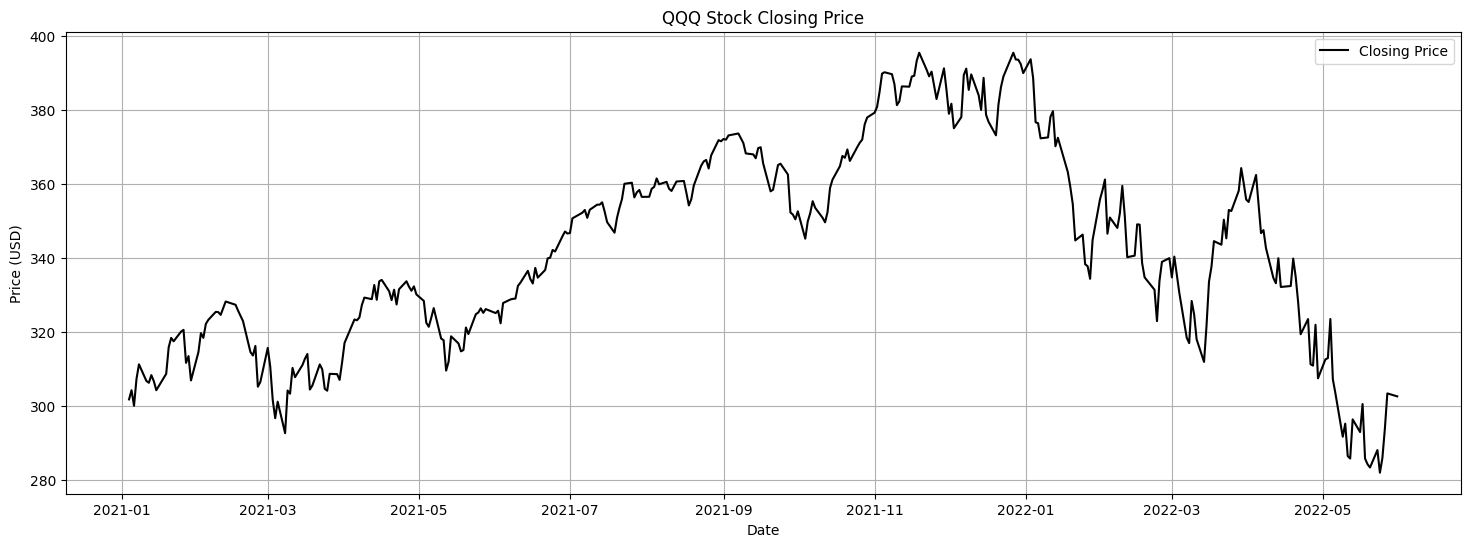

In [ ]:
#Choose a Stock
ticker = "QQQ"
#---------------#


stock_data = yf.download(ticker, start="2021-01-01", end="2022-06-01", interval="1d")

plt.figure(figsize=(18, 6))
plt.plot(stock_data.index, stock_data["Close"], label="Closing Price", color='black')
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title(str(ticker) + " Stock Closing Price")
plt.legend()
plt.grid()
plt.show()

## Questions...
* Is there an underlying function that governs market prices?
* What will happen if we try to use Regression models?
* Can I trust a Regression model?






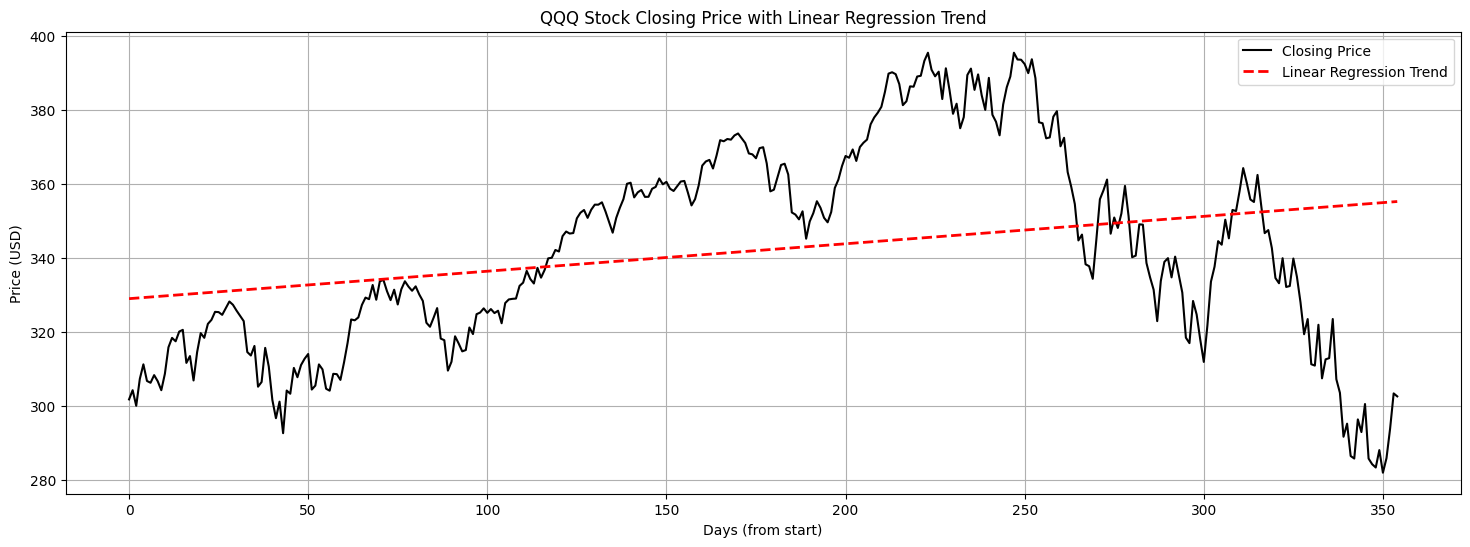

In [ ]:
# Lets try a simple linear regression
stock_data = stock_data.reset_index()

stock_data["Days"] = np.arange(len(stock_data))

X = stock_data["Days"].values.reshape(-1, 1)
y = stock_data["Close"].values

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

plt.figure(figsize=(18, 6))
plt.plot(stock_data["Days"], stock_data["Close"], label="Closing Price", color='black')

plt.plot(stock_data["Days"], y_pred, label="Linear Regression Trend", color='red', linestyle="dashed", linewidth=2)

plt.xlabel("Days (from start)")
plt.ylabel("Price (USD)")
plt.title(f"{ticker} Stock Closing Price with Linear Regression Trend")
plt.legend()
plt.grid()
plt.show()

[*********************100%***********************]  1 of 1 completed


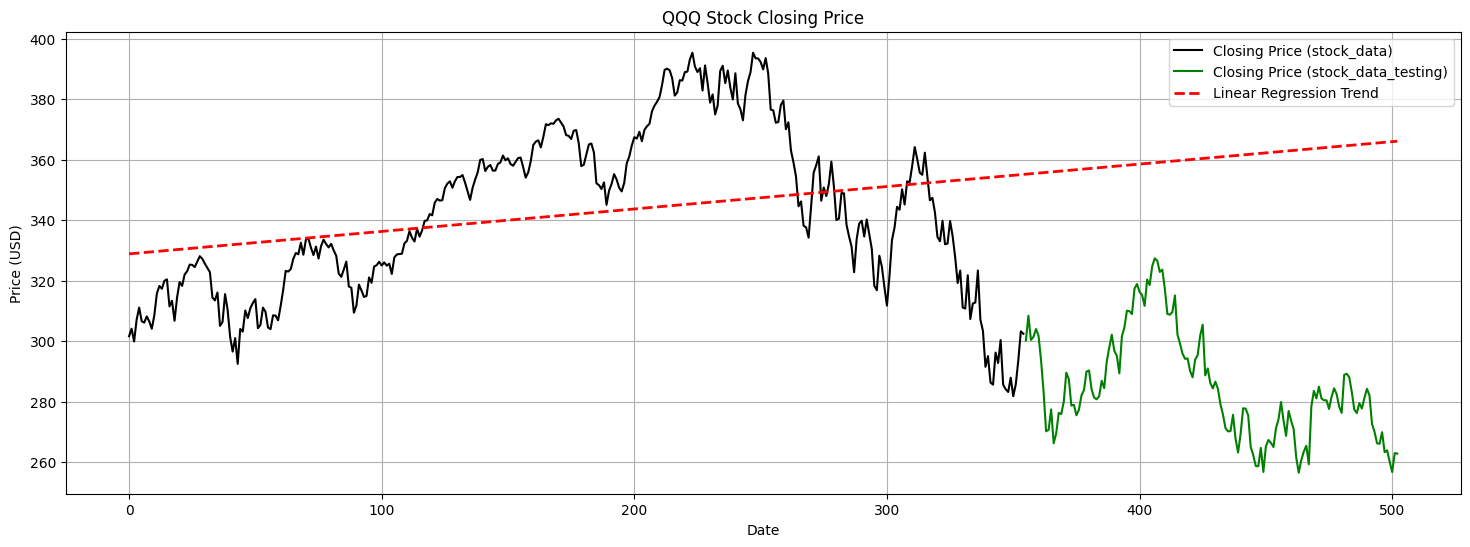

In [ ]:
stock_data_testing = yf.download(ticker, start="2022-06-01", end="2023-01-01", interval="1d")
stock_data_testing["Days"] = np.arange(len(stock_data_testing)) + len(stock_data)

X_combined = np.concatenate([X, stock_data_testing['Days'].values.reshape(-1, 1)], axis=0)
y_pred = model.predict(X_combined)

plt.figure(figsize=(18, 6))
plt.plot(stock_data['Days'], stock_data["Close"], label="Closing Price (stock_data)", color='black')
plt.plot(stock_data_testing['Days'], stock_data_testing["Close"], label="Closing Price (stock_data_testing)", color='green')
plt.plot(X_combined, y_pred, label="Linear Regression Trend", color='red', linestyle="dashed", linewidth=2)

plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title(str(ticker) + " Stock Closing Price")
plt.legend()
plt.grid()
plt.show()

## Test various Stocks and different Polynomial features...
* Keep in mind: An AI/ML algorithm tries to iteratively learn an underlying function that governs a naturally occuring phenomenon.
* Question: What underlying function governs the naturally occuring price of a stock or any financial asset?

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


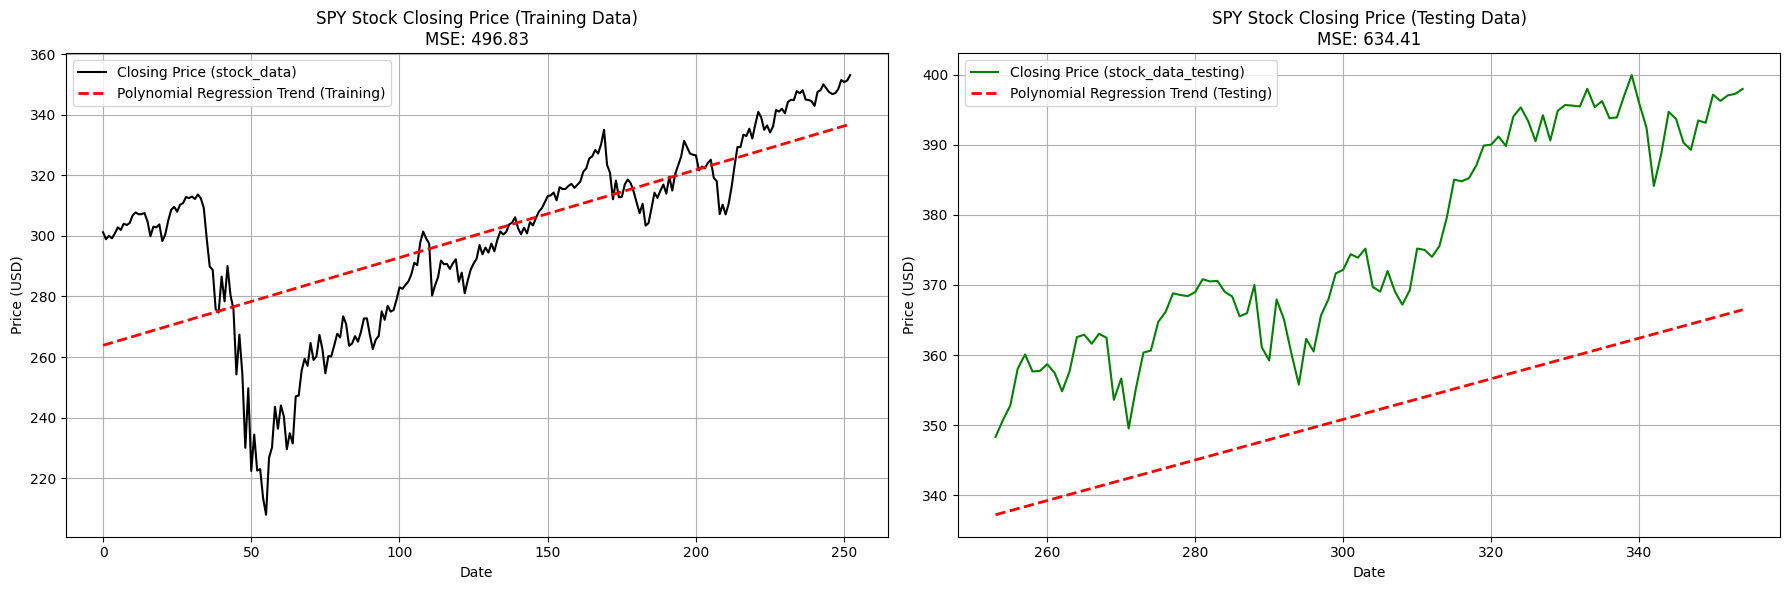

Mean Squared Error (Training Data): 496.83
Mean Squared Error (Testing Data): 634.41


In [ ]:
# Try out Different stocks and polynomial features 'degree'
ticker = "SPY"
degree = 1
#---------------#


stock_data = yf.download(ticker, start="2020-01-01", end="2021-01-01", interval="1d")
stock_data_testing = yf.download(ticker, start="2021-01-02", end="2021-06-01", interval="1d")

stock_data = stock_data.reset_index()
stock_data_testing = stock_data_testing.reset_index()

stock_data['Days'] = np.arange(len(stock_data))
stock_data_testing['Days'] = np.arange(len(stock_data), len(stock_data) + len(stock_data_testing))


X_train = stock_data['Days'].values.reshape(-1, 1)
y_train = stock_data['Close'].values

poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

X_combined = np.concatenate([X_train, stock_data_testing['Days'].values.reshape(-1, 1)], axis=0)
X_combined_poly = poly.transform(X_combined)

y_pred = poly_model.predict(X_combined_poly)
y_train_pred = poly_model.predict(X_train_poly)
y_test_pred = poly_model.predict(poly.transform(stock_data_testing['Days'].values.reshape(-1, 1)))

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(stock_data_testing["Close"], y_test_pred)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

ax1.plot(stock_data['Days'], stock_data["Close"], label="Closing Price (stock_data)", color='black')
ax1.plot(stock_data['Days'], y_train_pred, label="Polynomial Regression Trend (Training)", color='red', linestyle="dashed", linewidth=2)
ax1.set_xlabel("Date")
ax1.set_ylabel("Price (USD)")
ax1.set_title(f"{ticker} Stock Closing Price (Training Data)\nMSE: {mse_train:.2f}")
ax1.legend()
ax1.grid()

ax2.plot(stock_data_testing['Days'], stock_data_testing["Close"], label="Closing Price (stock_data_testing)", color='green')
ax2.plot(stock_data_testing['Days'], y_test_pred, label="Polynomial Regression Trend (Testing)", color='red', linestyle="dashed", linewidth=2)
ax2.set_xlabel("Date")
ax2.set_ylabel("Price (USD)")
ax2.set_title(f"{ticker} Stock Closing Price (Testing Data)\nMSE: {mse_test:.2f}")
ax2.legend()
ax2.grid()

plt.tight_layout()
plt.show()

print(f"Mean Squared Error (Training Data): {mse_train:.2f}")
print(f"Mean Squared Error (Testing Data): {mse_test:.2f}")


# Geometric Brownian Motion
* Lets assume the function that governs the price growth of a stock is itself random.


---

* How can we model randomness?
* How do we create a function that behaves with our modeled randomness?
* Why would this be helpful?

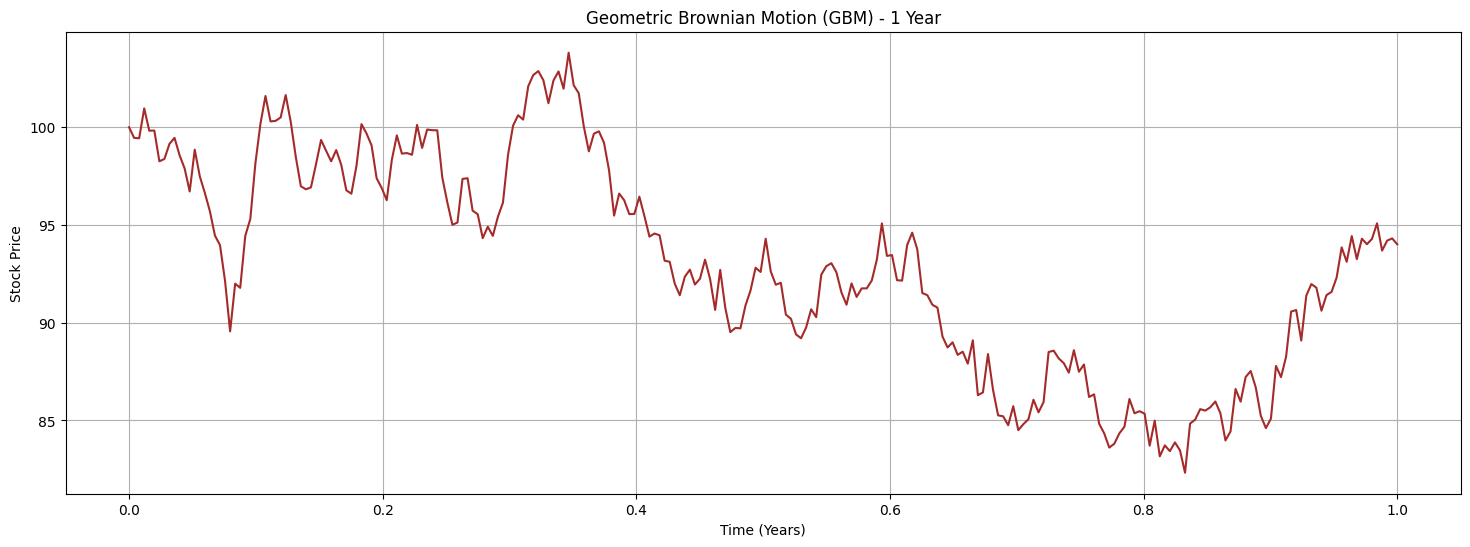

In [ ]:
# Choose Starting Stock price, mean returns, and volatility
S0 = 100
mu = 0.05
sigma = 0.2
#---------------#

T = 1
dt = 1/252
n_steps = int(T / dt)
np.random.seed()


time = np.linspace(0, T, n_steps)
S = np.zeros(n_steps)
S[0] = S0


for t in range(1, n_steps):
    dW = np.random.normal(0, np.sqrt(dt))
    S[t] = S[t-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * dW)

plt.figure(figsize=(18, 6))
plt.plot(time, S, color='brown')
plt.title(f"Geometric Brownian Motion (GBM) - 1 Year")
plt.xlabel("Time (Years)")
plt.ylabel("Stock Price")
plt.grid(True)
plt.show()

## Takeaways
* Yes, this looks like a stock price! (Good)
* Every time we run the simulation we get a different result. (Bad)


---

* Is each price associated with a probability of occuring?
* How can we measure that if it does?


---

* We have two parameters, mean returns and volatiltiy, how does that affect our probabilities?
* Again, how does that help us?

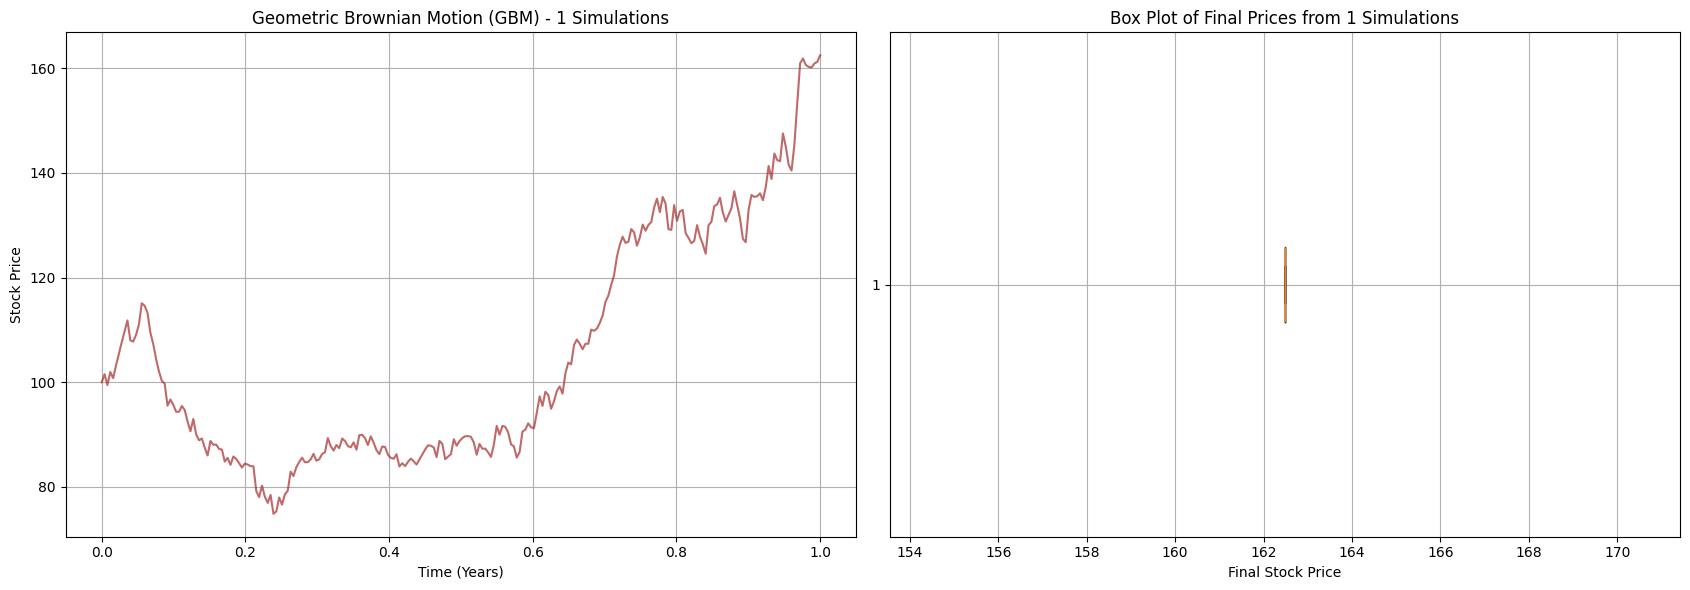

Mean of Final Prices: 162.48
Standard Deviation of Final Prices: 0.00


In [ ]:
# Choose mean returns volatility and number of iterations
M = 1
mu = 0.07
sigma = 0.3
#---------------#



S0 = 100
T = 1
dt = 1/252
n_steps = int(T / dt)
np.random.seed()

time = np.linspace(0, T, n_steps)
simulations = np.zeros((M, n_steps))

for m in range(M):
    S = np.zeros(n_steps)
    S[0] = S0
    for t in range(1, n_steps):
        dW = np.random.normal(0, np.sqrt(dt))
        S[t] = S[t-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * dW)
    simulations[m, :] = S

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 6))

for m in range(M):
    ax1.plot(time, simulations[m, :], color='brown', alpha=0.7)
ax1.set_title(f"Geometric Brownian Motion (GBM) - {M} Simulations")
ax1.set_xlabel("Time (Years)")
ax1.set_ylabel("Stock Price")
ax1.grid(True)

final_prices = simulations[:, -1]
ax2.boxplot(final_prices, vert=False)
ax2.set_title(f"Box Plot of Final Prices from {M} Simulations")
ax2.set_xlabel("Final Stock Price")
ax2.grid(True)

plt.tight_layout()
plt.show()

mean_final_price = np.mean(final_prices)
std_final_price = np.std(final_prices)

print(f"Mean of Final Prices: {mean_final_price:.2f}")
print(f"Standard Deviation of Final Prices: {std_final_price:.2f}")

# Discussion About our GBM Model
* We have an underlying function models the behavior of a stock price.
* Our function is stochastic meaning our results are in terms of a probability distribution
* The decsions we make as therefore associated with some level of risk
* IMPORTANT: We don't have model that tells us where a price will be but a model that can explain where a price can be because we will never actually know where a price will exactly be at a given time.

# Lets Play a Game
* I will set a price K, if the stock ends above K, you win, if the price ends below K, I win.


---
* We will try differt models with different mean returns and volatility
* If you trust the model, I will ask if you want to play the game, if not we will recalibrate the model
* We will also discuss where you would set K


[*********************100%***********************]  1 of 1 completed


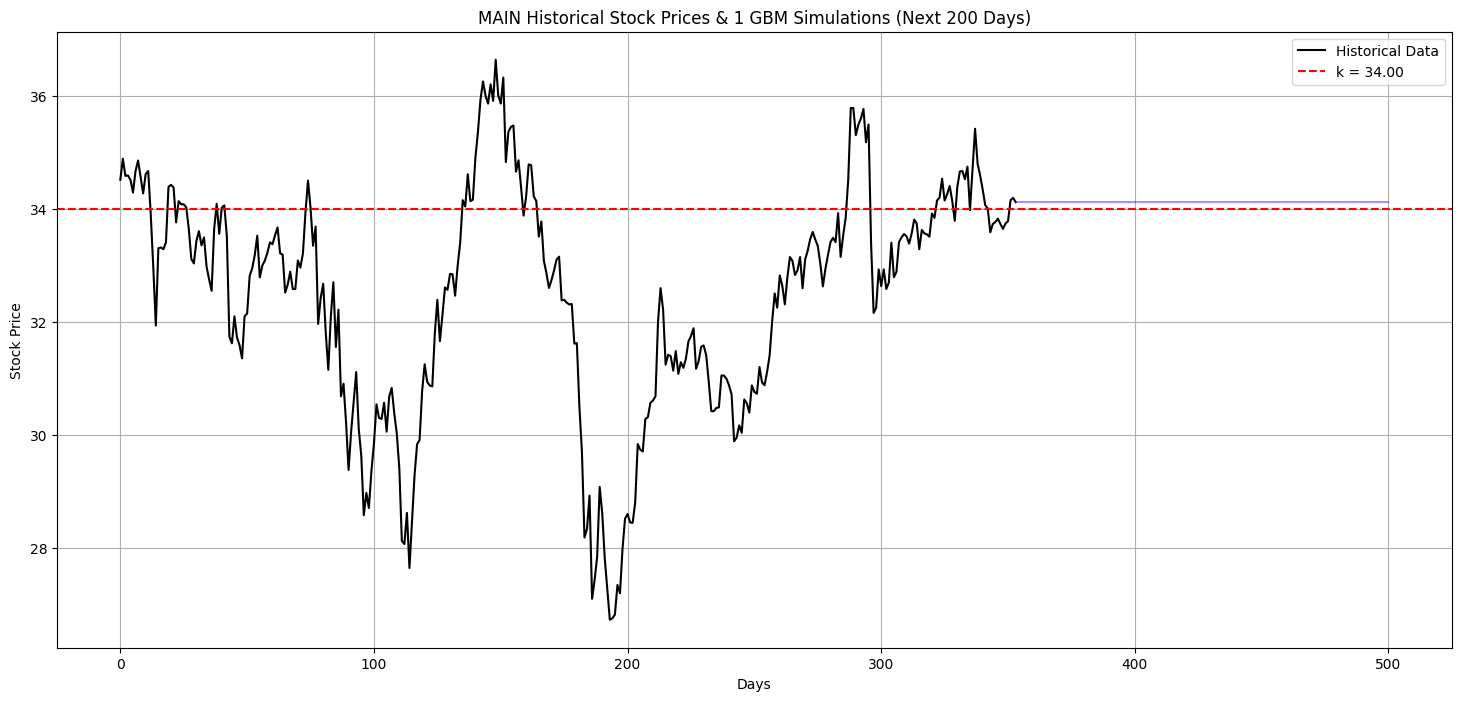



Percentage of final prices above k (34): 100.00%


In [ ]:
# Choose out Stock we want to trade
# Lets calibrate mean returns and volatility to build the best model
ticker = "MAIN"

mu = 0
sigma = 0
M = 1
#---------------#

stock_data = yf.download(ticker, start="2022-01-01", end="2023-06-01", interval="1d")
stock_data["Days"] = np.arange(len(stock_data))

# Lets Agree on a strike price
k = int(stock_data["Close"].iloc[-1])
#------------------------------#


T = 147 / 252
dt = 1/252
n_steps = int(T / dt)
np.random.seed()



S0 = stock_data["Close"].iloc[-1]

time = np.linspace(0, T, n_steps)

simulations = np.zeros((M, n_steps))

for m in range(M):
    S = np.zeros(n_steps)
    S[0] = S0
    for t in range(1, n_steps):
        dW = np.random.normal(0, np.sqrt(dt))
        S[t] = S[t-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * dW)
    simulations[m, :] = S

plt.figure(figsize=(18, 8))


plt.plot(stock_data['Days'], stock_data['Close'], label="Historical Data", color='black')

for m in range(M):
    plt.plot(time * 252 + stock_data['Days'].iloc[-1], simulations[m, :], color='blue', alpha=0.4)

plt.axhline(y=k, color='red', linestyle='--', label=f'k = {k:.2f}')

plt.title(f"{ticker} Historical Stock Prices & {M} GBM Simulations (Next 200 Days)")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.grid(True)
plt.legend()
plt.show()


final_prices = simulations[:, -1]
above_k = np.sum(final_prices > k)
percentage_above_k = (above_k / M) * 100
print(f"\n\nPercentage of final prices above k ({k}): {percentage_above_k:.2f}%")

# Lets see the Results
Lets Discuss
* Why did you make the decisions you made?
* What was helpful about this model?
* Are there any clear drawbacks?
* Based on how we calibrated mean returns and volatility, how would you go about using any AI/ML methodologies to best calibrate the GBM model?

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


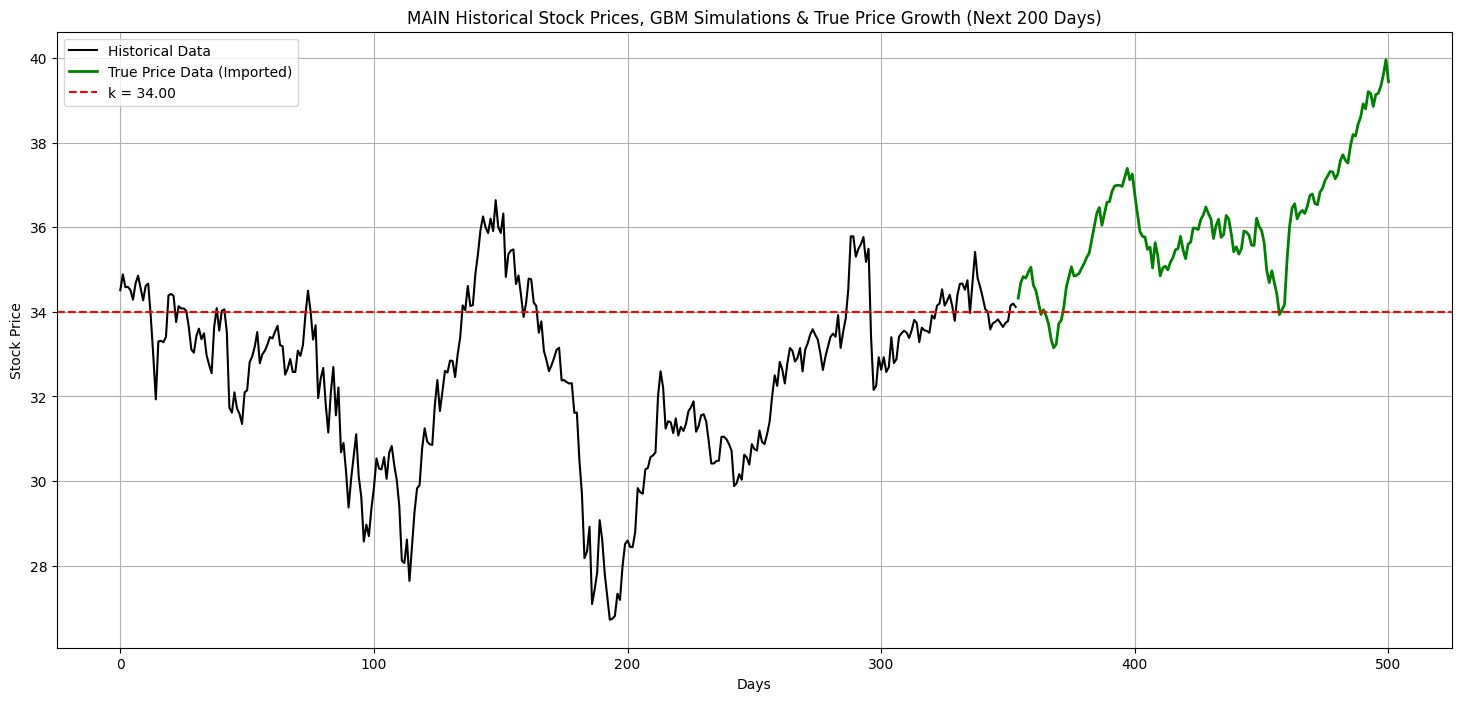

In [ ]:
ticker = "MAIN"

stock_data = yf.download(ticker, start="2022-01-01", end="2023-06-01", interval="1d")
stock_data["Days"] = np.arange(len(stock_data))

future_data = yf.download(ticker, start="2023-06-01", end="2023-12-31", interval="1d")
future_data["Days"] = np.arange(len(stock_data), len(stock_data) + len(future_data))


plt.figure(figsize=(18, 8))
plt.plot(stock_data['Days'], stock_data['Close'], label="Historical Data", color='black')
plt.plot(future_data['Days'], future_data['Close'], label="True Price Data (Imported)", color='green', linewidth=2)

plt.axhline(y=k, color='red', linestyle='--', label=f'k = {k:.2f}')

plt.title(f"{ticker} Historical Stock Prices, GBM Simulations & True Price Growth (Next 200 Days)")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.grid(True)
plt.legend()
plt.show()

# Distribution of GBM vs True Final Price
* What are we expecting to see vs what we see
* What does this say about the calibration of our GBM model?


Percentage of simulations ending above the true final price: 0.00%
Percentage of simulations ending below the true final price: 100.00%


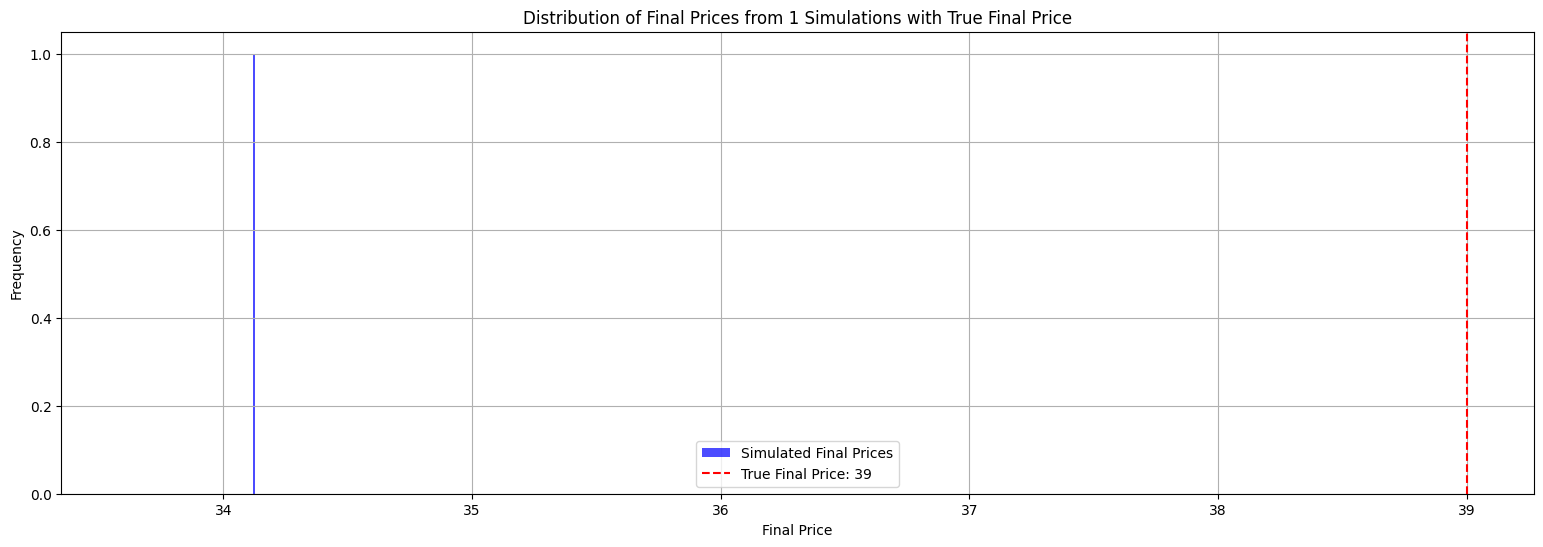


Percentage of simulations ending above the true final price: 0.00%
Percentage of simulations ending below the true final price: 100.00%


In [ ]:
true_final_price = int(future_data["Close"].iloc[-1])

above_true_price = np.sum(final_prices > true_final_price)
below_true_price = np.sum(final_prices < true_final_price)

percentage_above_true = (above_true_price / M) * 100
percentage_below_true = (below_true_price / M) * 100

print(f"\nPercentage of simulations ending above the true final price: {percentage_above_true:.2f}%")
print(f"Percentage of simulations ending below the true final price: {percentage_below_true:.2f}%")

plt.figure(figsize=(19, 6))
plt.hist(final_prices, bins=100, color='blue', alpha=0.7, label="Simulated Final Prices")

plt.axvline(true_final_price, color='red', linestyle='--', label=f'True Final Price: {true_final_price}')

plt.title(f"Distribution of Final Prices from {M} Simulations with True Final Price")
plt.xlabel("Final Price")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

print(f"\nPercentage of simulations ending above the true final price: {percentage_above_true:.2f}%")
print(f"Percentage of simulations ending below the true final price: {percentage_below_true:.2f}%")

# Are there any stochastic processes that can model a stock price?
* We were able to decompose out stock into mean returns and volatility
* Can we go one step furthur?

[*********************100%***********************]  1 of 1 completed


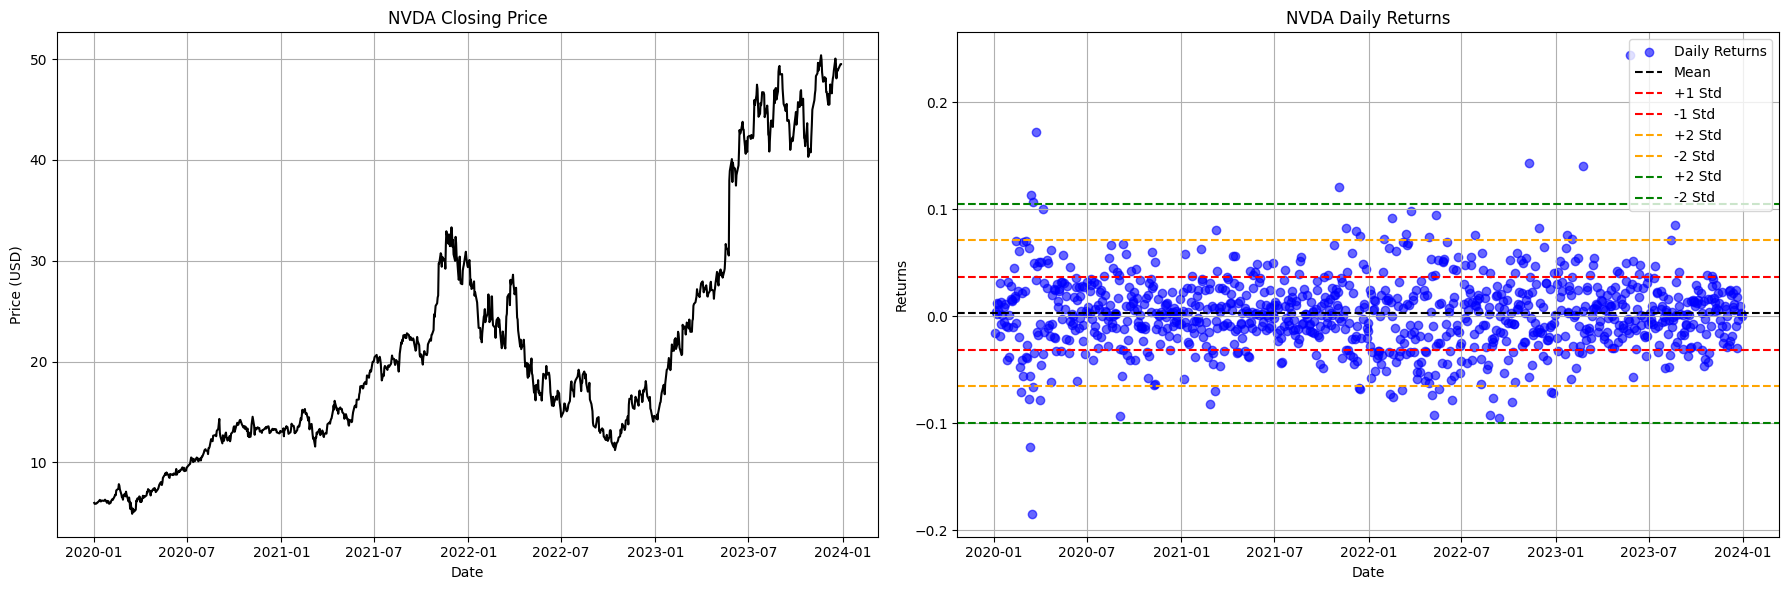

In [ ]:
#Choose Your Stock
ticker = "NVDA"
#---------------#


start_date = "2020-01-01"
end_date = "2024-01-01"

stock_data = yf.download(ticker, start=start_date, end=end_date)

stock_data["Returns"] = stock_data["Close"].pct_change()

mean_return = stock_data["Returns"].mean()
std_return = stock_data["Returns"].std()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

ax1.plot(stock_data.index, stock_data["Close"], color='black')
ax1.set_title(f"{ticker} Closing Price")
ax1.set_xlabel("Date")
ax1.set_ylabel("Price (USD)")
ax1.grid(True)

ax2.scatter(stock_data.index, stock_data["Returns"], color='blue', alpha=0.6, label="Daily Returns")
ax2.axhline(mean_return, color='black', linestyle="dashed", label="Mean")
ax2.axhline(mean_return + std_return, color='red', linestyle="dashed", label="+1 Std")
ax2.axhline(mean_return - std_return, color='red', linestyle="dashed", label="-1 Std")
ax2.axhline(mean_return + 2*std_return, color='orange', linestyle="dashed", label="+2 Std")
ax2.axhline(mean_return - 2*std_return, color='orange', linestyle="dashed", label="-2 Std")
ax2.axhline(mean_return + 3*std_return, color='green', linestyle="dashed", label="+2 Std")
ax2.axhline(mean_return - 3*std_return, color='green', linestyle="dashed", label="-2 Std")
ax2.set_title(f"{ticker} Daily Returns")
ax2.set_xlabel("Date")
ax2.set_ylabel("Returns")
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


# Modeling Rare and Extreme Random Events
So now we have 3 metric of decomposition
* General direction: Mean returns
* General Randomness: Volatility
* Rare events: Poisson Jumps

[*********************100%***********************]  1 of 1 completed


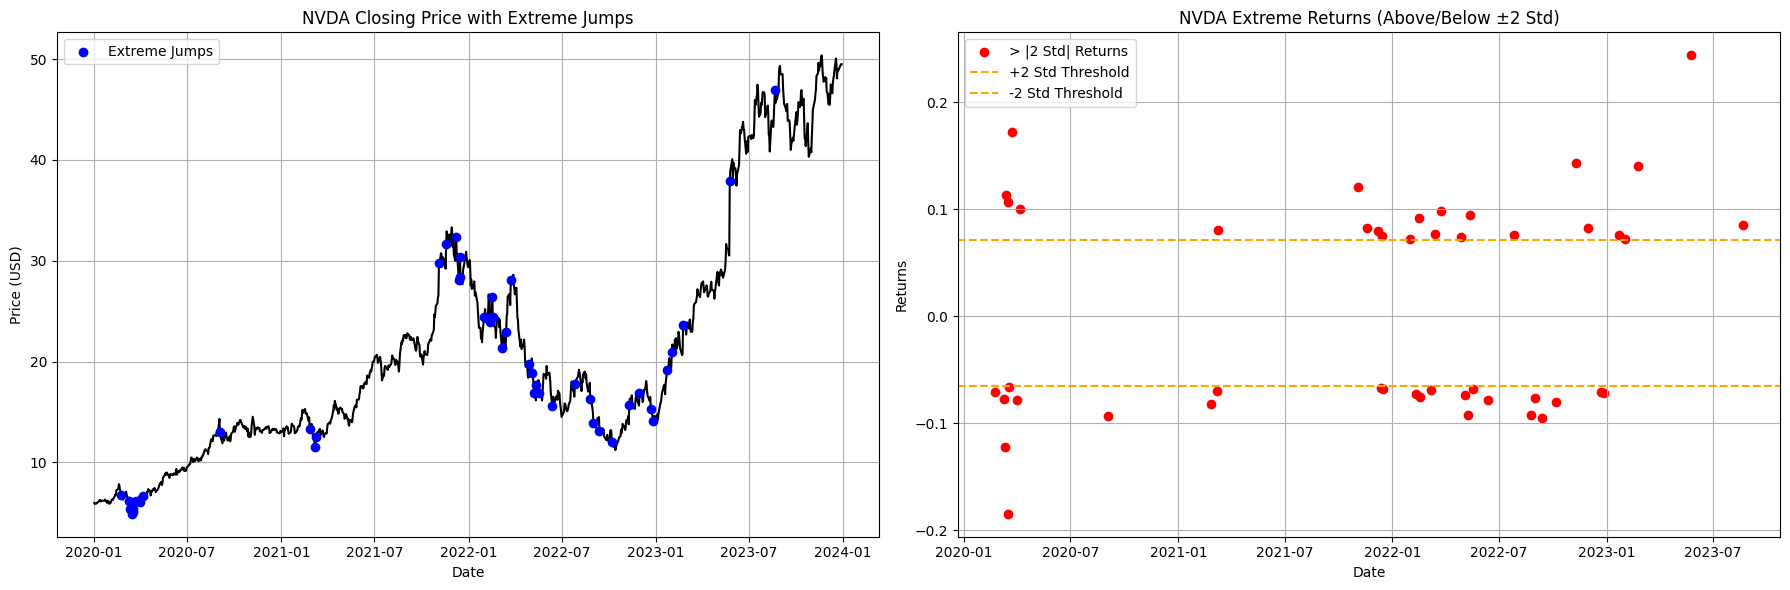

Mean of Extreme Returns: 0.0077
Volatility (Std Dev) of Extreme Returns: 0.0994


In [ ]:
ticker = "NVDA"

start_date = "2020-01-01"
end_date = "2024-01-01"
stock_data = yf.download(ticker, start=start_date, end=end_date)

stock_data["Returns"] = stock_data["Close"].pct_change()

mean_return = stock_data["Returns"].mean()
std_return = stock_data["Returns"].std()

extreme_returns = stock_data[(stock_data["Returns"] > mean_return + 2 * std_return) |
                             (stock_data["Returns"] < mean_return - 2 * std_return)]

extreme_mean = extreme_returns["Returns"].mean()
extreme_volatility = extreme_returns["Returns"].std()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

ax1.plot(stock_data.index, stock_data["Close"], color='black')
ax1.scatter(extreme_returns.index, extreme_returns["Close"], color='blue', label="Extreme Jumps", zorder=2)
ax1.set_title(f"{ticker} Closing Price with Extreme Jumps")
ax1.set_xlabel("Date")
ax1.set_ylabel("Price (USD)")
ax1.legend()
ax1.grid(True)

ax2.scatter(extreme_returns.index, extreme_returns["Returns"], color='red', label="> |2 Std| Returns")
ax2.axhline(mean_return + 2 * std_return, color='orange', linestyle="dashed", label="+2 Std Threshold")
ax2.axhline(mean_return - 2 * std_return, color='orange', linestyle="dashed", label="-2 Std Threshold")
ax2.set_title(f"{ticker} Extreme Returns (Above/Below ±2 Std)")
ax2.set_xlabel("Date")
ax2.set_ylabel("Returns")
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

print(f"Mean of Extreme Returns: {extreme_mean:.4f}")
print(f"Volatility (Std Dev) of Extreme Returns: {extreme_volatility:.4f}")

In [ ]:
extreme_returns = stock_data[(stock_data["Returns"] > mean_return + 2 * std_return) |
                             (stock_data["Returns"] < mean_return - 2 * std_return)]

intensity = len(extreme_returns) / len(stock_data)
mean_jump_size = extreme_returns["Returns"].mean()
volatility_jump = extreme_returns["Returns"].std()

print(f"Intensity: {intensity:.4f}")
print(f"Mean Jump Size: {mean_jump_size:.4f}")
print(f"Volatility of Jump Size: {volatility_jump:.4f}")

Intensity: 0.0467
Mean Jump Size: 0.0077
Volatility of Jump Size: 0.0994


# Lets See the Poisson Jump Diffusion Model in Action

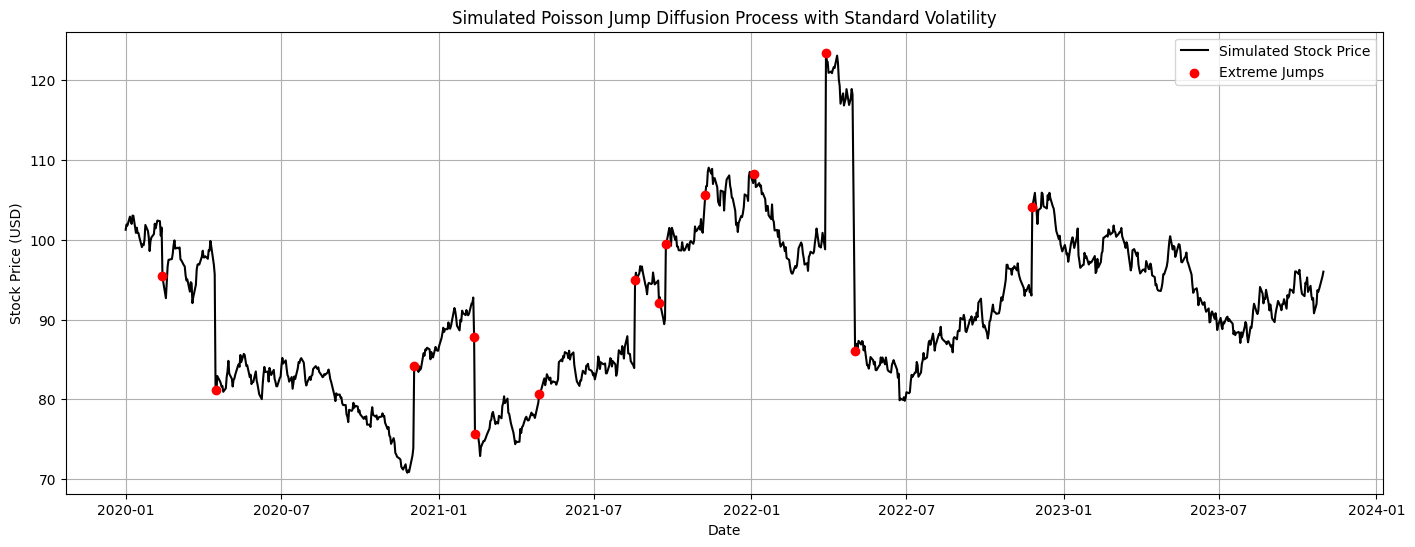

Simulated Intensity (jump_intensity): 0.0200
Simulated Mean Jump Size (jump_mean): 0.0200
Simulated Volatility of Jump Size (jump_volatility): 0.2000
Simulated Standard Volatility (standard_volatility): 0.1500


In [ ]:
# Choose your parameters to try the model
jump_intensity = 0.02
jump_mean = 0.02
jump_volatility = 0.2
standard_volatility = 0.15
num_steps = 1000
time_step = 1 / 252
#------------------------------#


initial_stock_price = 100
brownian_motion = np.random.normal(0, np.sqrt(time_step), size=num_steps)

poisson_jumps = np.random.poisson(jump_intensity, size=num_steps)

jump_sizes = np.random.lognormal(mean=jump_mean, sigma=jump_volatility, size=num_steps)

geometric_brownian_motion = np.cumsum((standard_volatility * brownian_motion) - (0.5 * standard_volatility**2 * time_step))

jump_effect = np.zeros(num_steps)
for i in range(num_steps):
    if poisson_jumps[i] > 0:
        jump_effect[i] = np.sum(np.log(jump_sizes[i]))

simulated_prices = initial_stock_price * np.exp(geometric_brownian_motion + np.cumsum(jump_effect))

time_index = pd.date_range(start="2020-01-01", periods=num_steps, freq="B")

simulated_prices_series = pd.Series(simulated_prices, index=time_index)

jump_times = simulated_prices_series.index[poisson_jumps > 0]
jump_prices = simulated_prices_series[poisson_jumps > 0]

fig, ax = plt.subplots(figsize=(17, 6))
ax.plot(simulated_prices_series.index, simulated_prices_series, color='black', label="Simulated Stock Price")
ax.scatter(jump_times, jump_prices, color='red', label="Extreme Jumps", zorder=5)
ax.set_title("Simulated Poisson Jump Diffusion Process with Standard Volatility")
ax.set_xlabel("Date")
ax.set_ylabel("Stock Price (USD)")
ax.legend()
ax.grid(True)
plt.show()

print(f"Simulated Intensity (jump_intensity): {jump_intensity:.4f}")
print(f"Simulated Mean Jump Size (jump_mean): {jump_mean:.4f}")
print(f"Simulated Volatility of Jump Size (jump_volatility): {jump_volatility:.4f}")
print(f"Simulated Standard Volatility (standard_volatility): {standard_volatility:.4f}")

# Wrapping up: Lets see how the Models we built Perform
* Which one is better? Why?
* Which one would you trust?


---

* And now how do we calibrate our models for the best results?

[*********************100%***********************]  1 of 1 completed


Calibrated Parameters:
  - mu (drift): 0.4377
  - sigma (volatility): 0.3744
  - lambda_jump (Poisson intensity): 0.0179
  - mu_jump (Mean jump size): 0.0082
  - sigma_jump (Volatility of jump size): 0.0998


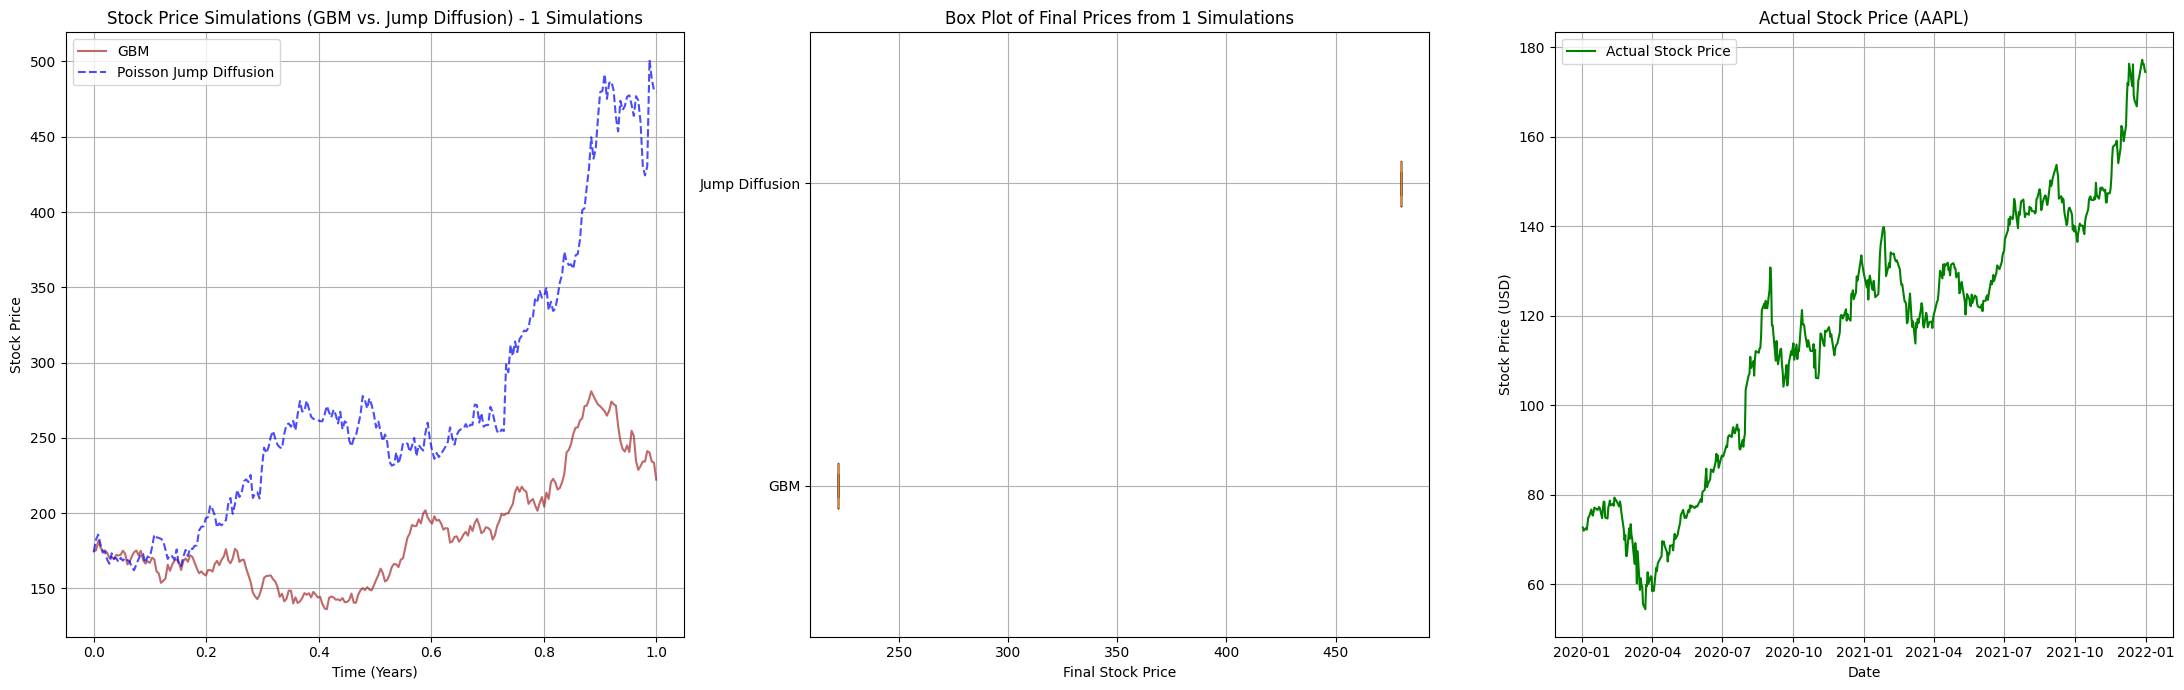

GBM - Mean Final Price: 222.22, Std Dev: 0.00
Jump Diffusion - Mean Final Price: 479.83, Std Dev: 0.00


In [ ]:
warnings.filterwarnings("ignore")

#Choose your Stock and number of simulations
ticker = "AAPL"
M = 1
#---------------#

start_date = "2020-01-01"
end_date = "2022-01-01"

data = yf.download(ticker, start=start_date, end=end_date)
prices = data['Close'].values

log_returns = np.log(prices[1:] / prices[:-1])

dt = 1 / 252
mu = np.mean(log_returns) / dt
sigma = np.std(log_returns) / np.sqrt(dt)

threshold = 3 * np.std(log_returns)
jump_indices = np.where(np.abs(log_returns) > threshold)[0]
jump_returns = log_returns[jump_indices]

lambda_jump = len(jump_returns) / (len(log_returns))

mu_jump = np.mean(jump_returns)
sigma_jump = np.std(jump_returns)

print(f"Calibrated Parameters:")
print(f"  - mu (drift): {mu:.4f}")
print(f"  - sigma (volatility): {sigma:.4f}")
print(f"  - lambda_jump (Poisson intensity): {lambda_jump:.4f}")
print(f"  - mu_jump (Mean jump size): {mu_jump:.4f}")
print(f"  - sigma_jump (Volatility of jump size): {sigma_jump:.4f}")

S0 = prices[-1]
T = 1
n_steps = int(T / dt)
time = np.linspace(0, T, n_steps)

simulations_gbm = np.zeros((M, n_steps))
for m in range(M):
    S = np.zeros(n_steps)
    S[0] = S0
    for t in range(1, n_steps):
        dW = np.random.normal(0, np.sqrt(dt))
        S[t] = S[t-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * dW)
    simulations_gbm[m, :] = S

simulations_jump = np.zeros((M, n_steps))
for m in range(M):
    S = np.zeros(n_steps)
    S[0] = S0
    for t in range(1, n_steps):
        dW = np.random.normal(0, np.sqrt(dt))
        N_t = np.random.poisson(lambda_jump)
        J_t = np.sum(np.random.normal(mu_jump, sigma_jump, N_t)) if N_t > 0 else 0
        S[t] = S[t-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * dW + J_t)
    simulations_jump[m, :] = S

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(22, 7))

for m in range(M):
    ax1.plot(time, simulations_gbm[m, :], color='brown', alpha=0.7, label='GBM' if m == 0 else "")
    ax1.plot(time, simulations_jump[m, :], color='blue', alpha=0.7, linestyle='dashed', label='Poisson Jump Diffusion' if m == 0 else "")
ax1.set_title(f"Stock Price Simulations (GBM vs. Jump Diffusion) - {M} Simulations")
ax1.set_xlabel("Time (Years)")
ax1.set_ylabel("Stock Price")
ax1.grid(True)
ax1.legend()

final_prices_gbm = simulations_gbm[:, -1]
final_prices_jump = simulations_jump[:, -1]
ax2.boxplot([final_prices_gbm, final_prices_jump], vert=False, labels=["GBM", "Jump Diffusion"])
ax2.set_title(f"Box Plot of Final Prices from {M} Simulations")
ax2.set_xlabel("Final Stock Price")
ax2.grid(True)

ax3.plot(data.index, prices, color='green', label='Actual Stock Price')
ax3.set_title("Actual Stock Price (AAPL)")
ax3.set_xlabel("Date")
ax3.set_ylabel("Stock Price (USD)")
ax3.grid(True)
ax3.legend()

plt.tight_layout()
plt.show()

mean_gbm = np.mean(final_prices_gbm)
std_gbm = np.std(final_prices_gbm)
mean_jump = np.mean(final_prices_jump)
std_jump = np.std(final_prices_jump)

print(f"GBM - Mean Final Price: {mean_gbm:.2f}, Std Dev: {std_gbm:.2f}")
print(f"Jump Diffusion - Mean Final Price: {mean_jump:.2f}, Std Dev: {std_jump:.2f}")